In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
df = pd.read_csv('/Users/suchirmvelpanur/Desktop/SDS-TA-Materials/Network Traffic Load Balancing/network_traffic_dataset.csv')
df

,date,l_ipn,r_asn,f
0,2006-07-01,0,701,1
1,2006-07-01,0,714,1
2,2006-07-01,0,1239,1
3,2006-07-01,0,1680,1
4,2006-07-01,0,2514,1
...,...,...,...,...
20798,2006-09-30,8,36351,3
20799,2006-09-30,8,36856,4
20800,2006-09-30,9,2152,1
20801,2006-09-30,9,8070,1


In [6]:
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

In [7]:
# Set 'date' as index for easier resampling
df.set_index('date', inplace=True)

In [8]:
# Aggregate the 'f' column over time intervals 
traffic_aggregated = df['f'].resample('D').sum()

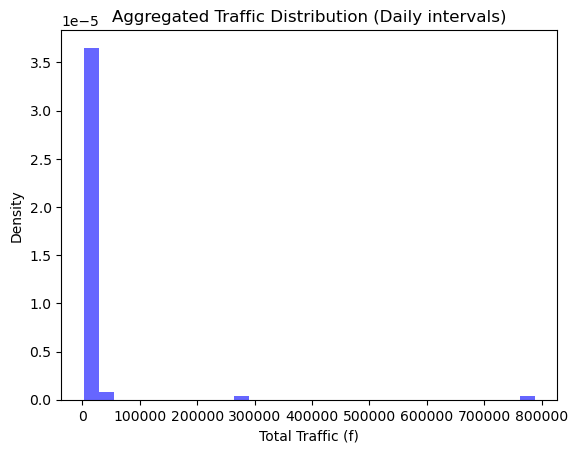

In [9]:
# Check the distribution of the aggregated traffic
plt.hist(traffic_aggregated, bins=30, density=True, alpha=0.6, color='b')
plt.title('Aggregated Traffic Distribution (Daily intervals)')
plt.xlabel('Total Traffic (f)')
plt.ylabel('Density')
plt.show()


In [10]:
# Calculate mean and standard deviation
mu, sigma = np.mean(traffic_aggregated), np.std(traffic_aggregated)

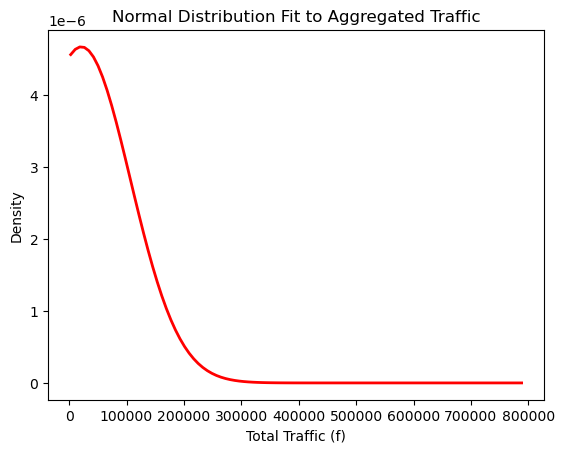

In [11]:
# Plot the normal distribution curve
x = np.linspace(min(traffic_aggregated), max(traffic_aggregated), 100)
plt.plot(x, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu)**2 / (2 * sigma**2)), linewidth=2, color='r')
plt.title('Normal Distribution Fit to Aggregated Traffic')
plt.xlabel('Total Traffic (f)')
plt.ylabel('Density')
plt.show()

In [20]:
# Load Balancing : Simulate load distribution across 3 servers with capacities 3000, 4000 and 5000
num_servers = 3
predicted_load = traffic_aggregated.mean()
server_capacities = np.array([3000, 4000, 3500])  

In [21]:
# Distribute the traffic load
load_distribution = predicted_load / server_capacities

In [22]:
# Determine if any server is likely to be overloaded
overloaded_servers = load_distribution > 1.0

In [23]:
# Print the results
for i in range(num_servers):
    status = "Overloaded" if overloaded_servers[i] else "Normal"
    print(f"Server {i+1}: Predicted Load = {predicted_load:.2f}, Capacity = {server_capacities[i]}, Status: {status}")

Server 1: Predicted Load = 21235.85, Capacity = 3000, Status: Overloaded
Server 2: Predicted Load = 21235.85, Capacity = 4000, Status: Overloaded
Server 3: Predicted Load = 21235.85, Capacity = 3500, Status: Overloaded
